### Import Libraries

In [50]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

<IPython.core.display.Javascript object>

In [51]:
# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

<IPython.core.display.Javascript object>

In [52]:
# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

<IPython.core.display.Javascript object>

In [53]:
# To supress numerical display in scientific notations - only two decimasl for float datatypes
pd.set_option("display.float_format", lambda x: "%.2f" % x)

<IPython.core.display.Javascript object>

In [54]:
# Avoid displaying warnings
import warnings

<IPython.core.display.Javascript object>

In [55]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [56]:
# loading the dataset
df = pd.read_csv("shopping_trends_updated.csv")

<IPython.core.display.Javascript object>

In [57]:
# checking shape of the data
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns in the dataset")

There are 3900 rows and 18 columns in the dataset


<IPython.core.display.Javascript object>

In [58]:
df.head(2)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.10,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.10,Yes,Express,Yes,Yes,2,Cash,Fortnightly


<IPython.core.display.Javascript object>

In [59]:
# to view last 5 rows of the dataset
df.tail(2)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.80,No,Express,No,No,24,Venmo,Weekly
3899,3900,52,Female,Handbag,Accessories,81,California,M,Beige,Spring,3.10,No,Store Pickup,No,No,33,Venmo,Quarterly


<IPython.core.display.Javascript object>

In [60]:
# let's create a copy of the data to avoid any changes to original data
data = df.copy()

<IPython.core.display.Javascript object>

In [61]:
# checking for duplicate values in the data
data.duplicated().sum()

0

<IPython.core.display.Javascript object>

- There are no duplicate values in the data.

In [62]:
# checking the names of the columns in the data
print(data.columns)

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')


<IPython.core.display.Javascript object>

In [63]:
# checking column datatypes and number of non-null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

<IPython.core.display.Javascript object>

* `Age`, `Purchase Amount (USD)`, `Previous Purchases` are of *integer* type.

* `Review Rating` is of *float* type.

* All other columns are *object* type.

### Fixing the data types

* The columns that are *object* type we can change them to categories.

* *Coverting objects to category reduces the data space required to store the dataframe*

In [64]:
data["Gender"] = data["Gender"].astype("category")
data["Item Purchased"] = data["Item Purchased"].astype("category")
data["Category"] = data["Category"].astype("category")
data["Location"] = data["Location"].astype("category")
data["Size"] = data["Size"].astype("category")
data["Color"] = data["Color"].astype("category")
data["Season"] = data["Season"].astype("category")
data["Subscription Status"] = data["Subscription Status"].astype("category")
data["Payment Method"] = data["Payment Method"].astype("category")
data["Shipping Type"] = data["Shipping Type"].astype("category")
data["Discount Applied"] = data["Discount Applied"].astype("category")
data["Promo Code Used"] = data["Promo Code Used"].astype("category")
data["Frequency of Purchases"] = data["Frequency of Purchases"].astype("category")

<IPython.core.display.Javascript object>

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Customer ID             3900 non-null   int64   
 1   Age                     3900 non-null   int64   
 2   Gender                  3900 non-null   category
 3   Item Purchased          3900 non-null   category
 4   Category                3900 non-null   category
 5   Purchase Amount (USD)   3900 non-null   int64   
 6   Location                3900 non-null   category
 7   Size                    3900 non-null   category
 8   Color                   3900 non-null   category
 9   Season                  3900 non-null   category
 10  Review Rating           3900 non-null   float64 
 11  Subscription Status     3900 non-null   category
 12  Shipping Type           3900 non-null   category
 13  Discount Applied        3900 non-null   category
 14  Promo Code Used         

<IPython.core.display.Javascript object>

* We can see that the memory usage has decreased by 50%

### Creating new columns for better analysis and visualization

* We will create a new column out of the `Age` column.

* This new column will be of a categorical data type by dividing the column in generations. EX. Millenials, Baby Boomers, GenZ.

* This is done taking in account the current year is 2023

In [66]:
conditions = [
    (data["Age"] >= 59),
    (data["Age"] >= 43) & (data["Age"] <= 58),
    (data["Age"] >= 27) & (data["Age"] <= 42),
    (data["Age"] >= 11) & (data["Age"] <= 26),
]

values = [
    "59-77 - Baby Booomers",
    "43-58 - GenX",
    "27-42 - Millenialls",
    "11-26 - GenZ",
]

<IPython.core.display.Javascript object>

In [67]:
# create new column age_group
data["age_group"] = np.select(conditions, values)

<IPython.core.display.Javascript object>

In [68]:
# change data type from object to category to save up in memory
data["age_group"] = data["age_group"].astype("category")

<IPython.core.display.Javascript object>

In [69]:
# check data types again
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Customer ID             3900 non-null   int64   
 1   Age                     3900 non-null   int64   
 2   Gender                  3900 non-null   category
 3   Item Purchased          3900 non-null   category
 4   Category                3900 non-null   category
 5   Purchase Amount (USD)   3900 non-null   int64   
 6   Location                3900 non-null   category
 7   Size                    3900 non-null   category
 8   Color                   3900 non-null   category
 9   Season                  3900 non-null   category
 10  Review Rating           3900 non-null   float64 
 11  Subscription Status     3900 non-null   category
 12  Shipping Type           3900 non-null   category
 13  Discount Applied        3900 non-null   category
 14  Promo Code Used         

<IPython.core.display.Javascript object>

### Checking for missing values in the data

In [70]:
data.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
age_group                 0
dtype: int64

<IPython.core.display.Javascript object>

* There are no missing values in the dataset

In [71]:
# Let's look at the statistical summary of the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer ID,3900.00,1950.50,1125.98,1.00,975.75,1950.50,2925.25,3900.00
Age,3900.00,44.07,15.21,18.00,31.00,44.00,57.00,70.00
Purchase Amount (USD),3900.00,59.76,23.69,20.00,39.00,60.00,81.00,100.00
Review Rating,3900.00,3.75,0.72,2.50,3.10,3.70,4.40,5.00
Previous Purchases,3900.00,25.35,14.45,1.00,13.00,25.00,38.00,50.00


<IPython.core.display.Javascript object>

* We are not dropping customer ID yet.  Customer ID is ordered.
* This means that perhaps there is a relationship between client tenure and sales?  Let's find out!

### Statistical Analysis

#### Observations of numerical columns

* We have 3,900 clients

* In all cases our numerical columns's mean is very similar to the median value.  

* This means that the data follows a bell shape curve and does not possess massive outliers.  

* It is safely to say that we can use *the mean* as a measure of central tendency in all cases.

* On average the `age` of our customers is 44 years old.

* On average the `Purchase Amount (USD)` is 59.8 dollars.

* The average `Review Rating` is 3.75.

* On average customers have made 25 `Previous Purchases`

### Let's look at the non-numeric columns

In [72]:
# filtering non-numeric columns
cat_columns = data.select_dtypes(exclude=np.number).columns
cat_columns

Index(['Gender', 'Item Purchased', 'Category', 'Location', 'Size', 'Color',
       'Season', 'Subscription Status', 'Shipping Type', 'Discount Applied',
       'Promo Code Used', 'Payment Method', 'Frequency of Purchases',
       'age_group'],
      dtype='object')

<IPython.core.display.Javascript object>

In [73]:
# printing the number of occurrences and %s of each categorical column
for column in cat_columns:

    # print("Frequency Numerical")
    # print(data[column].value_counts().sort_values(ascending=False))
    print("Frequency in Percentage (%)")
    print(data[column].value_counts().sort_values(ascending=False) / len(data) * 100)
    print("-" * 50)

Frequency in Percentage (%)
Male     68.00
Female   32.00
Name: Gender, dtype: float64
--------------------------------------------------
Frequency in Percentage (%)
Jewelry      4.38
Blouse       4.38
Pants        4.38
Shirt        4.33
Dress        4.26
Sweater      4.21
Jacket       4.18
Coat         4.13
Sunglasses   4.13
Belt         4.13
Sandals      4.10
Socks        4.08
Skirt        4.05
Scarf        4.03
Shorts       4.03
Hat          3.95
Handbag      3.92
Hoodie       3.87
Shoes        3.85
T-shirt      3.77
Sneakers     3.72
Boots        3.69
Backpack     3.67
Gloves       3.59
Jeans        3.18
Name: Item Purchased, dtype: float64
--------------------------------------------------
Frequency in Percentage (%)
Clothing      44.54
Accessories   31.79
Footwear      15.36
Outerwear      8.31
Name: Category, dtype: float64
--------------------------------------------------
Frequency in Percentage (%)
Montana          2.46
California       2.44
Idaho            2.38
Illinois    

<IPython.core.display.Javascript object>

### Observations of non-numerical columns

* `Gender`: 68% of our clients are male and 32% are female


* `Item Purchased`: The most purchased items are Jewerly, Blouse, and Pants.  And the least purchased items are Jeans, Gloves, Backpack. 


* However, none of the items are outliers and all `Item Purchased` seem to be spread very evenly across our data. 


* It does not seem to be an obvious problem with any of the `Item Purchased`.


* Our sales in terms of product `Category` are as follows: Clothing 44.54%, Accessories 31.79%, Footwear 15.36%, Outer wear 8.31%


* `Location`: The company has sales in all the 50 states.  The top 3 states in sales are Montana 2.46%, California 2.44%, and Idaho 2.38%.  


* The `Location` with the least sales are Rhode Island 1.62%, Kansas 1.62%, and Hawaii 1.67%.  However, the differences between the top three and top bottom `Location` is small and there is not an obvious problem with any state.


* The most popular `Size` is M with 45%, followed by L 27%, S 17% and XL 11%


* The most purchased `Color` is Olive with 4.54%, and the least purchased `Color` is Gold with 3.54%


* The 4 `Seasons` are almost equally important for the sales of the company.  Each season sales are roughly 25%.  Spring 25.62% is the top season and Summer 24.49% the bottom. 


* Only 27% of our clients have a `Subscription`


* Paypal 17.36%, Credit Card 17.21%, and Cash 17.18% are the top three `Payment Methods`.  


* Free shipping si the most popular `Shipping Type` with 17.31% the other methods are roughly 16%


* `Discount Applied` & `Promo Code Used`: 43% of sales had discount/promo code used. Values in the two columns are exactly the same, meaning a Promo Code is the only type of discount.  We eliminate one column to avoid redundancy.


* `Frequency of Purchases`: Every 3 Months   14.97%, Annually 14.67%, Quarterly 14.44%



* `age_group`: Millenialls 30.77%, GenX 30.69%, Baby Boomers 22.13%.  Gen Z  16.41% is much lower than the group

### Let's visualize the data

### Univariate Analysis 

#### Numerical Columns

In [74]:
# filtering out non-numeric columns
num_columns = data.select_dtypes(include=["int64", "float64"]).columns
num_columns

Index(['Customer ID', 'Age', 'Purchase Amount (USD)', 'Review Rating',
       'Previous Purchases'],
      dtype='object')

<IPython.core.display.Javascript object>

In [79]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(10, 5), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

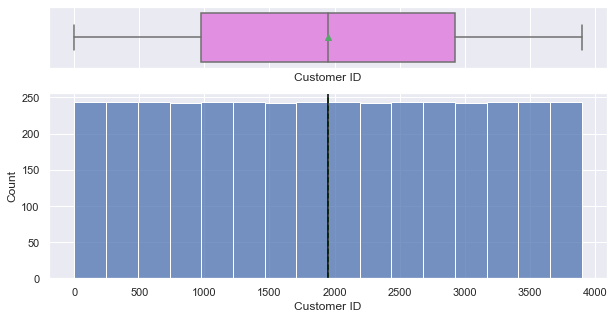

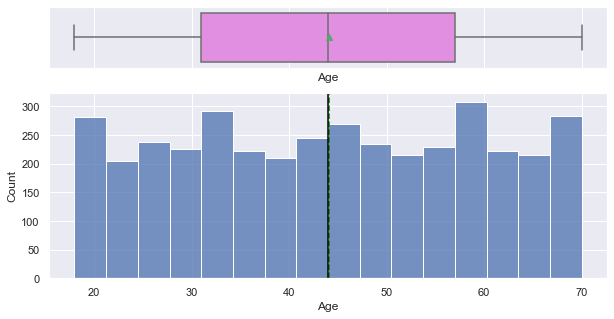

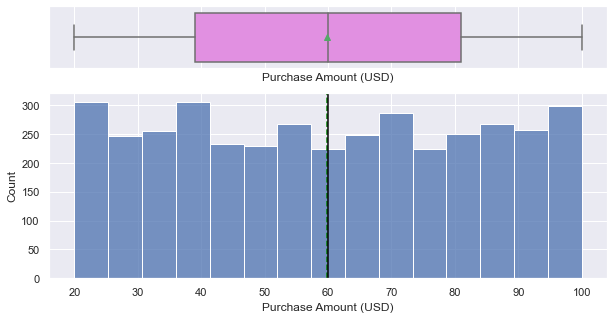

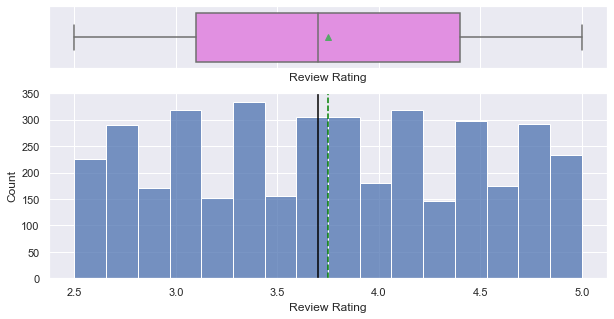

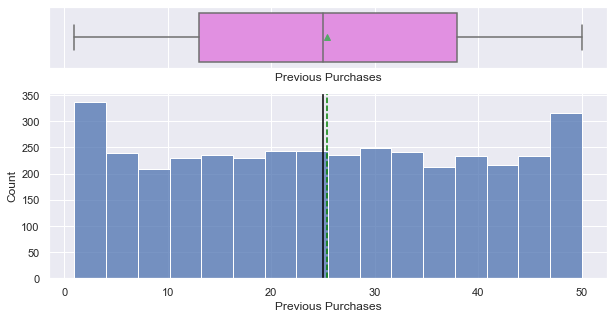

<IPython.core.display.Javascript object>

In [81]:
######## To activate the function massively
# Loop
for col in num_columns:
    histogram_boxplot(data, col)

#### Categorical Columns

In [113]:
# function to create labeled barplots


def labeled_barplot(
    data,
    feature,
    perc=True,
    n=None,
):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature]
        .value_counts()
        .sort_values(ascending=False)
        .index[0],  # .index[:n]
        # .count().reset_index(name='value_counts').sort_values(['count'], ascending=False)
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

In [114]:
plot_order = df.sort_values(by="Amount", ascending=False).ID.values
plot = sns.barplot(x="ID", y="Amount", data=df, order=plot_order)

KeyError: 'Amount'

<IPython.core.display.Javascript object>

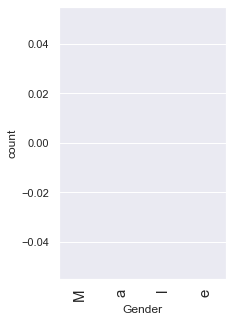

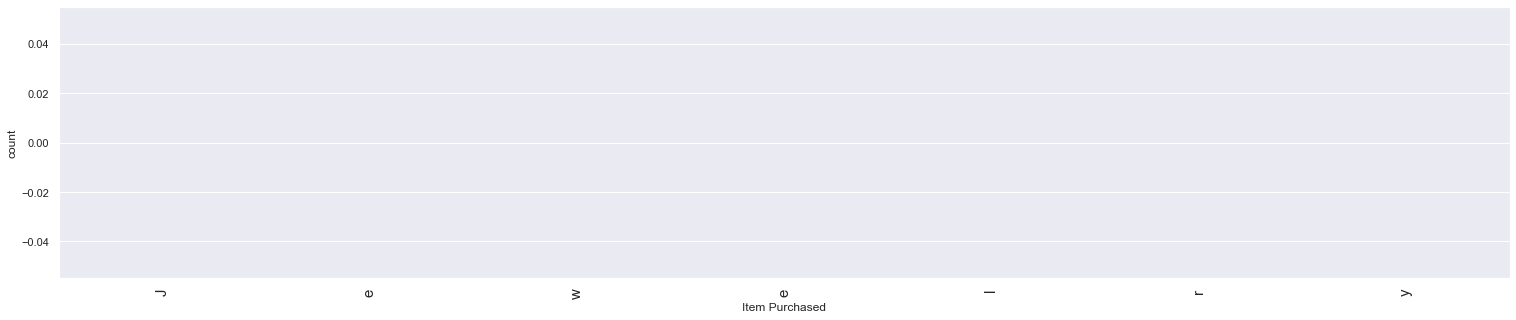

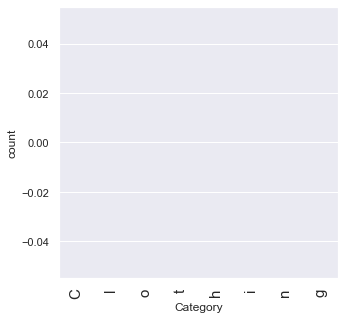

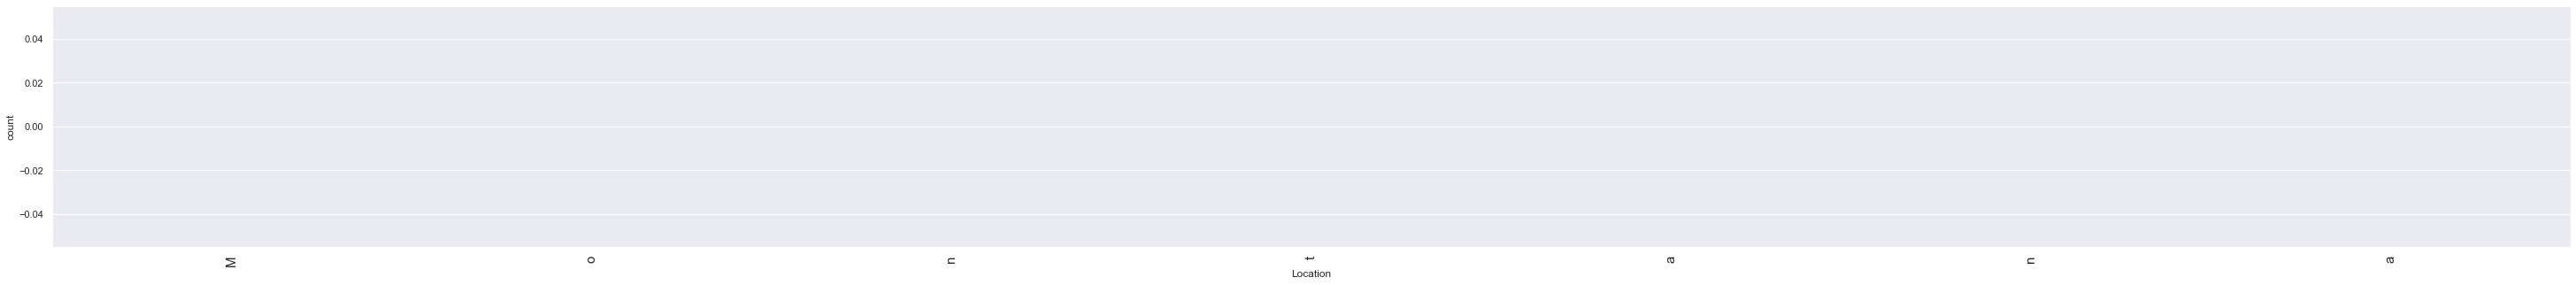

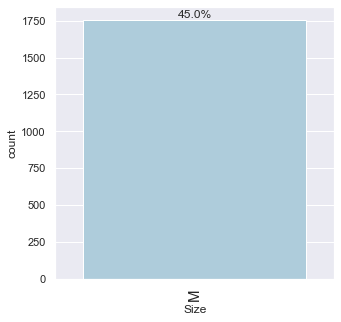

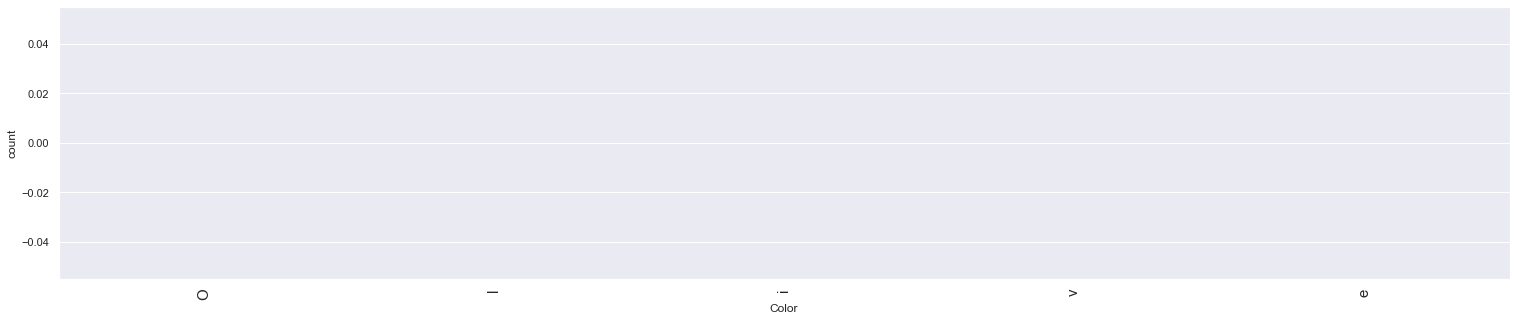

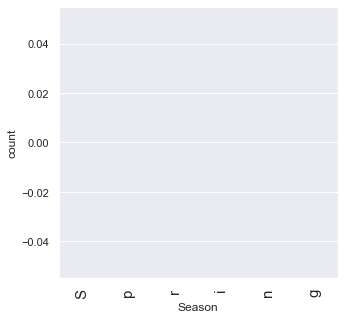

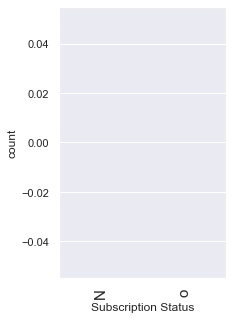

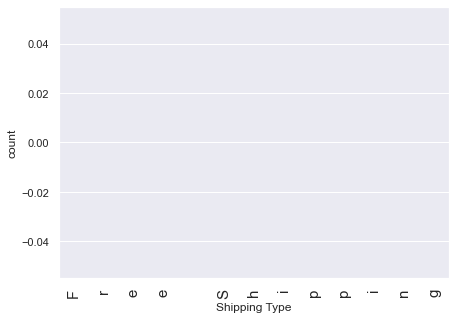

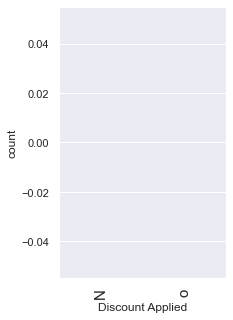

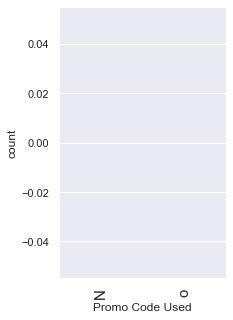

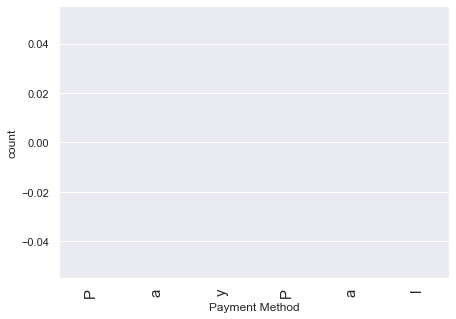

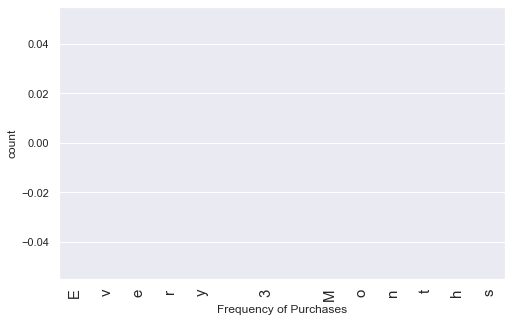

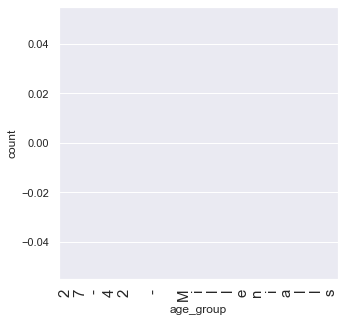

<IPython.core.display.Javascript object>

In [115]:
for col in cat_columns:
    labeled_barplot(data, feature=col)

#### `Education`:

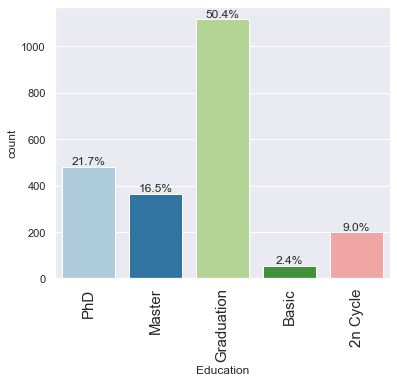

<IPython.core.display.Javascript object>

In [44]:
labeled_barplot(data, "Education", perc=True)

#### `Marital_Status`:

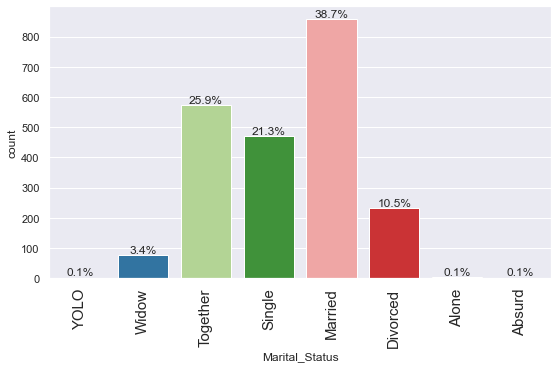

<IPython.core.display.Javascript object>

In [45]:
labeled_barplot(data, "Marital_Status", perc=True)

#### `Kidhome`:

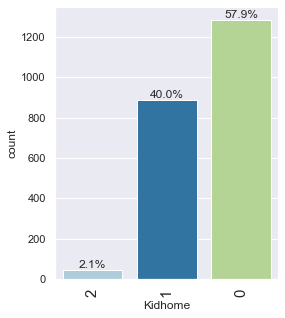

<IPython.core.display.Javascript object>

In [46]:
labeled_barplot(data, "Kidhome", perc=True)

#### `Teenhome`:

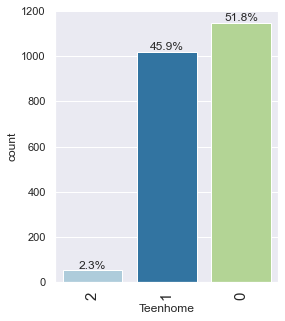

<IPython.core.display.Javascript object>

In [47]:
labeled_barplot(data, "Teenhome", perc=True)

#### `NumDealsPurchases`:

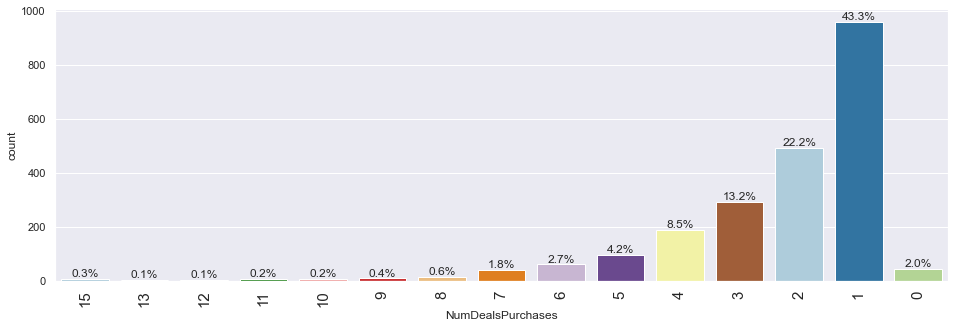

<IPython.core.display.Javascript object>

In [48]:
labeled_barplot(data, "NumDealsPurchases", perc=True)

#### `NumWebPurchases`:

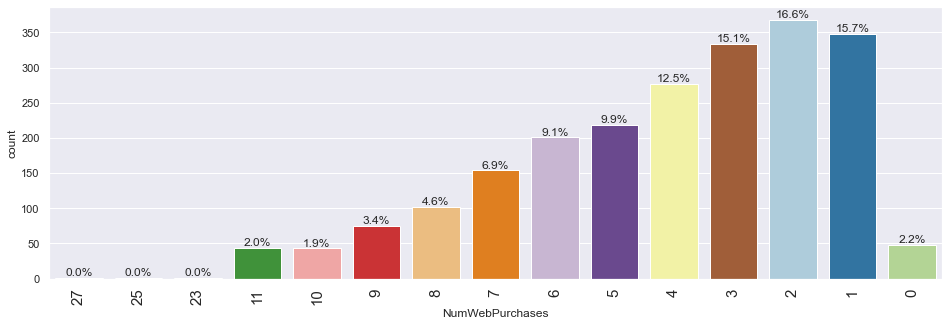

<IPython.core.display.Javascript object>

In [49]:
labeled_barplot(data, "NumWebPurchases", perc=True)

#### `NumCatalogPurchases`:

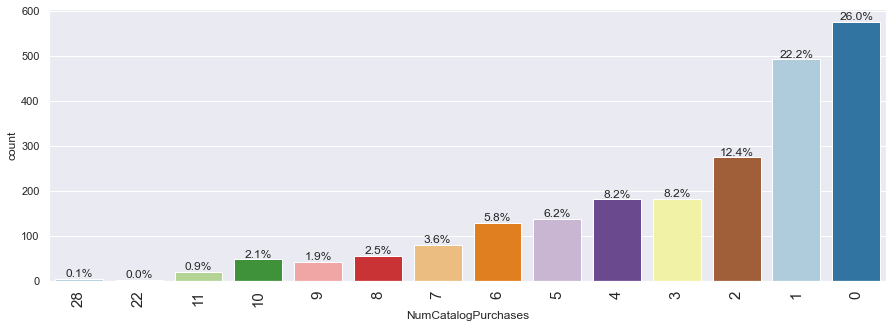

<IPython.core.display.Javascript object>

In [50]:
labeled_barplot(data, "NumCatalogPurchases", perc=True)

#### `NumStorePurchases`:

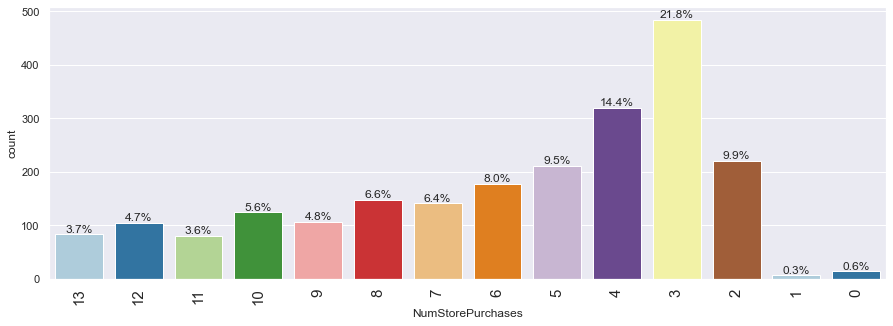

<IPython.core.display.Javascript object>

In [51]:
labeled_barplot(data, "NumStorePurchases", perc=True)

#### `NumWebVisitsMonth`:

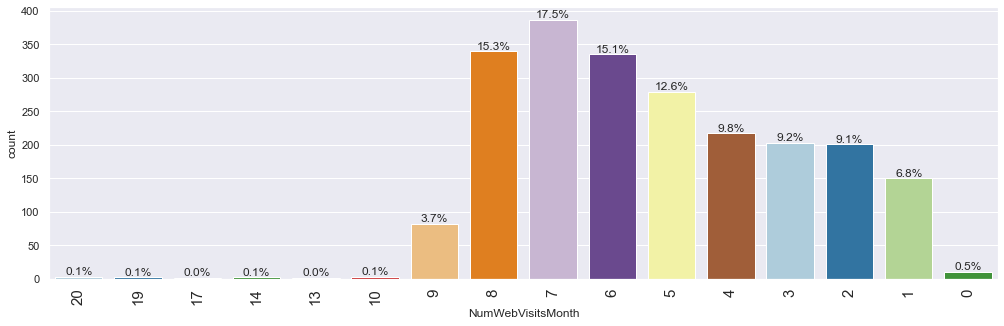

<IPython.core.display.Javascript object>

In [52]:
labeled_barplot(data, "NumWebVisitsMonth", perc=True)

#### `Response`:

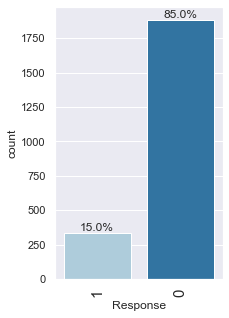

<IPython.core.display.Javascript object>

In [53]:
labeled_barplot(data, "Response", perc=True)

#### `Complain`:

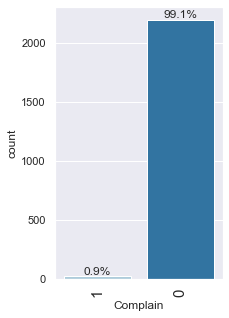

<IPython.core.display.Javascript object>

In [54]:
labeled_barplot(data, "Complain", perc=True)

#### `AcceptedCmp1`:

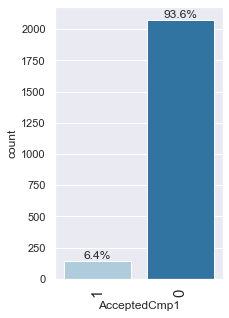

<IPython.core.display.Javascript object>

In [55]:
labeled_barplot(data, "AcceptedCmp1", perc=True)

#### `AcceptedCmp2`:

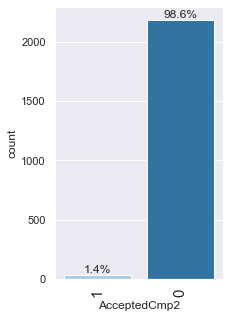

<IPython.core.display.Javascript object>

In [56]:
labeled_barplot(data, "AcceptedCmp2", perc=True)

#### `AcceptedCmp3`:

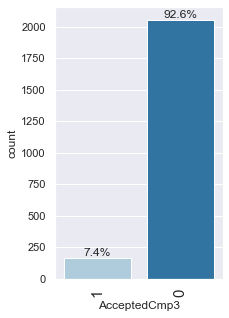

<IPython.core.display.Javascript object>

In [57]:
labeled_barplot(data, "AcceptedCmp3", perc=True)

#### `AcceptedCmp4`:

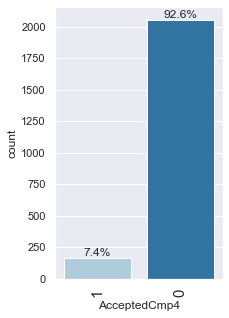

<IPython.core.display.Javascript object>

In [58]:
labeled_barplot(data, "AcceptedCmp4", perc=True)

#### `AcceptedCmp5`:

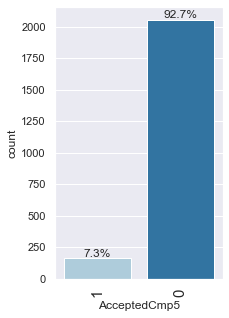

<IPython.core.display.Javascript object>

In [59]:
labeled_barplot(data, "AcceptedCmp5", perc=True)

#### `age_group`:

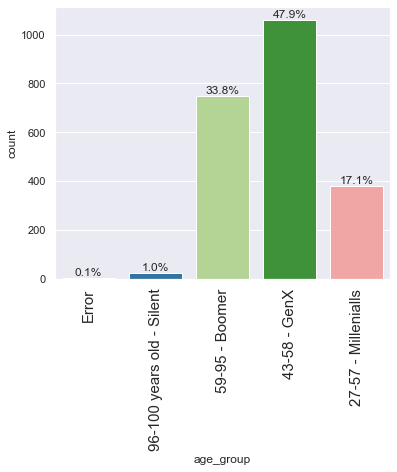

<IPython.core.display.Javascript object>

In [60]:
labeled_barplot(data, "age_group", perc=True)

#### `date_customer`:

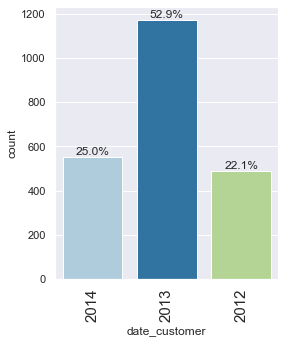

<IPython.core.display.Javascript object>

In [61]:
labeled_barplot(data, "date_customer", perc=True)

### Bivariate analysis

**We will not consider the *categorical* columns for correlation check as they have only 0 or 1 values.**

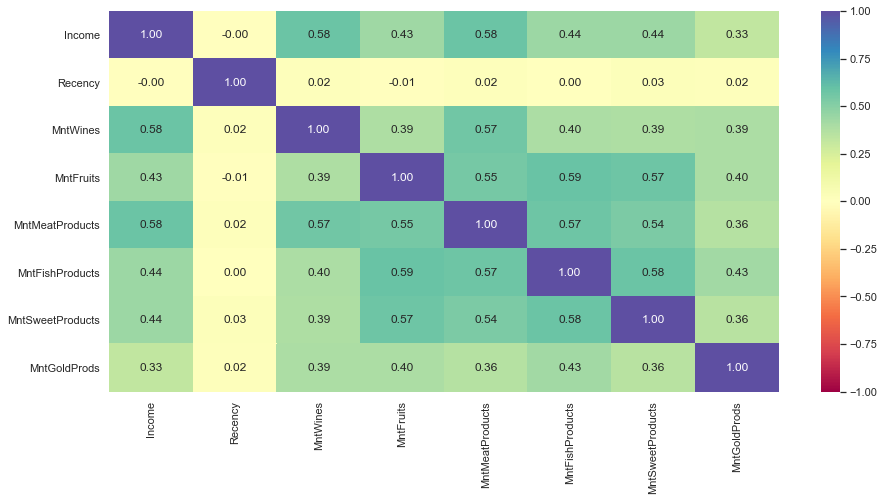

<IPython.core.display.Javascript object>

In [64]:
plt.figure(figsize=(15, 7))
sns.heatmap(
    data[num_columns].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
Income,1.00,-0.00,0.58,0.43,0.58,0.44,0.44,0.33
Recency,-0.00,1.00,0.02,-0.01,0.02,0.00,0.03,0.02
MntWines,0.58,0.02,1.00,0.39,0.57,0.40,0.39,0.39
MntFruits,0.43,-0.01,0.39,1.00,0.55,0.59,0.57,0.40
MntMeatProducts,0.58,0.02,0.57,0.55,1.00,0.57,0.54,0.36
MntFishProducts,0.44,0.00,0.40,0.59,0.57,1.00,0.58,0.43
MntSweetProducts,0.44,0.03,0.39,0.57,0.54,0.58,1.00,0.36
MntGoldProds,0.33,0.02,0.39,0.40,0.36,0.43,0.36,1.00


<IPython.core.display.Javascript object>

* `MntWines` and `Income` columns are highly correlated.
* `MntMeatProducts` and `Income` columns are highly correlated.

### Let's check the variation in `Response` with some of the numerical columns in our data

#### `Response` vs `Income`

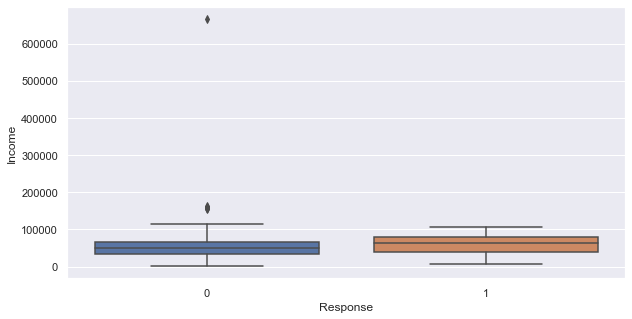

<IPython.core.display.Javascript object>

In [76]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="Response", y="Income", data=data)
plt.show()

#### `Response` vs `MntWines`

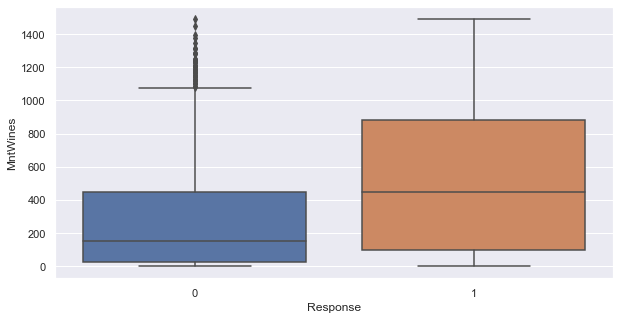

<IPython.core.display.Javascript object>

In [79]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="Response", y="MntWines", data=data)
plt.show()

#### `Response` vs `MntMeatProducts`

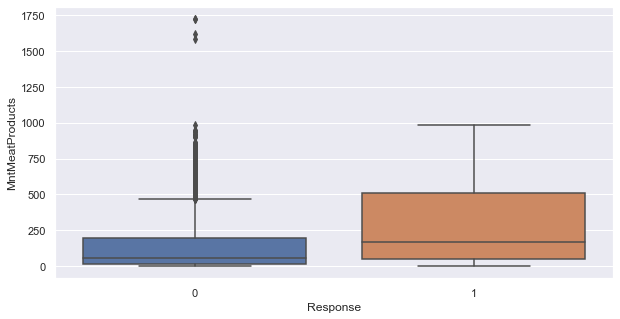

<IPython.core.display.Javascript object>

In [80]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="Response", y="MntMeatProducts", data=data)
plt.show()

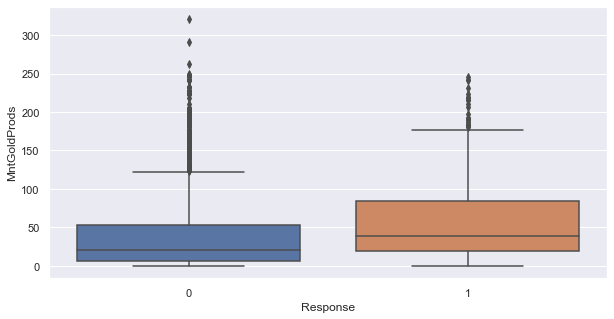

<IPython.core.display.Javascript object>

In [81]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="Response", y="MntGoldProds", data=data)
plt.show()

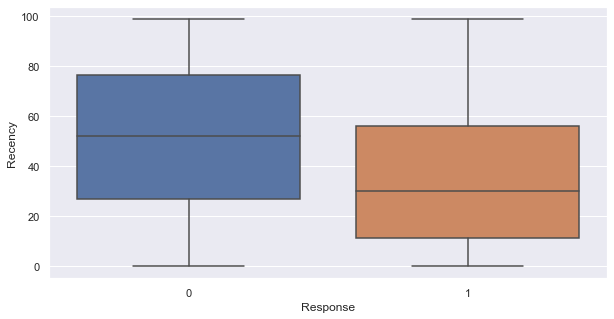

<IPython.core.display.Javascript object>

In [82]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="Response", y="Recency", data=data)
plt.show()

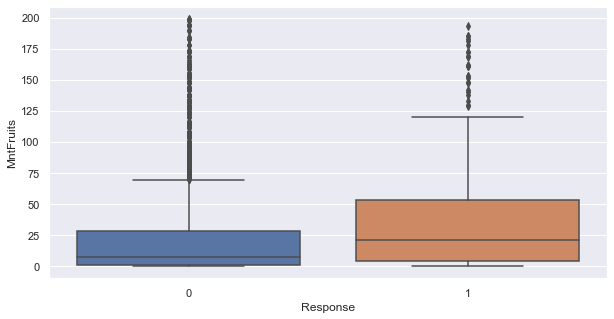

<IPython.core.display.Javascript object>

In [83]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="Response", y="MntFruits", data=data)
plt.show()

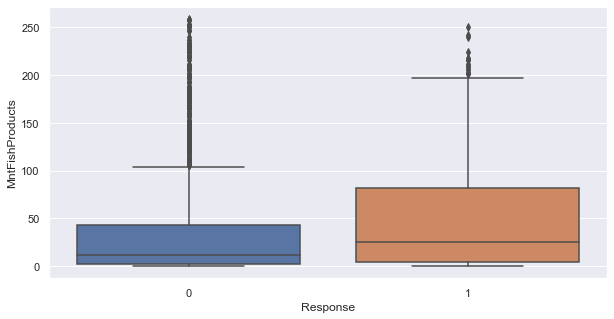

<IPython.core.display.Javascript object>

In [84]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="Response", y="MntFishProducts", data=data)
plt.show()

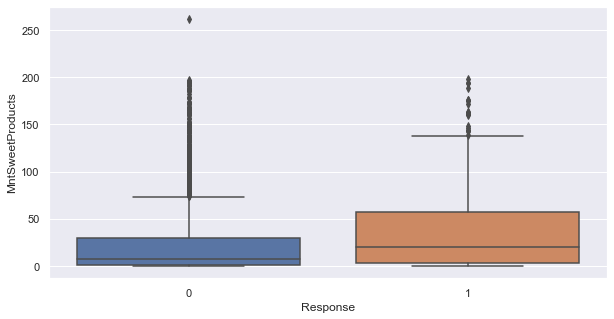

<IPython.core.display.Javascript object>

In [85]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="Response", y="MntSweetProducts", data=data)
plt.show()

In [91]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

Response       0    1   All
Education                  
All         1883  333  2216
Graduation   964  152  1116
PhD          380  101   481
Master       309   56   365
2n Cycle     178   22   200
Basic         52    2    54
------------------------------------------------------------------------------------------------------------------------


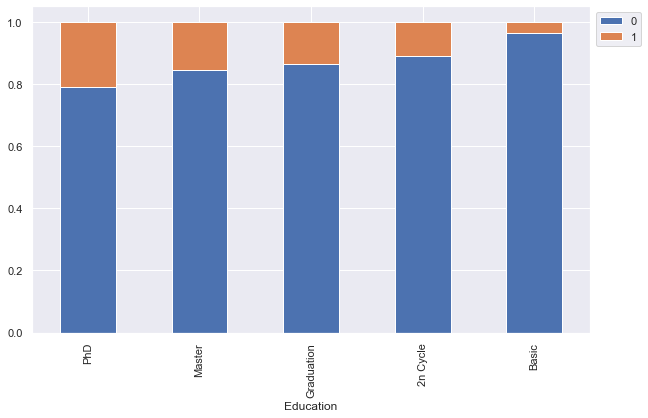

<IPython.core.display.Javascript object>

In [92]:
stacked_barplot(data, "Education", "Response")

Response           0    1   All
Marital_Status                 
All             1883  333  2216
Single           365  106   471
Married          759   98   857
Together         513   60   573
Divorced         184   48   232
Widow             58   18    76
Absurd             1    1     2
Alone              2    1     3
YOLO               1    1     2
------------------------------------------------------------------------------------------------------------------------


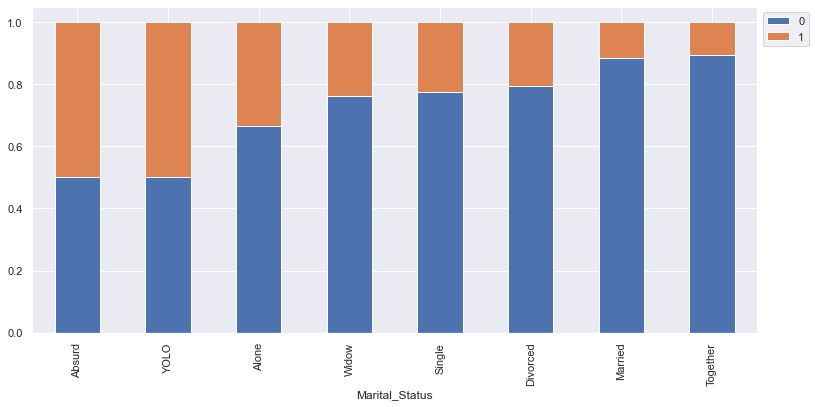

<IPython.core.display.Javascript object>

In [93]:
stacked_barplot(data, "Marital_Status", "Response")

Response     0    1   All
Kidhome                  
All       1883  333  2216
0         1062  221  1283
1          777  110   887
2           44    2    46
------------------------------------------------------------------------------------------------------------------------


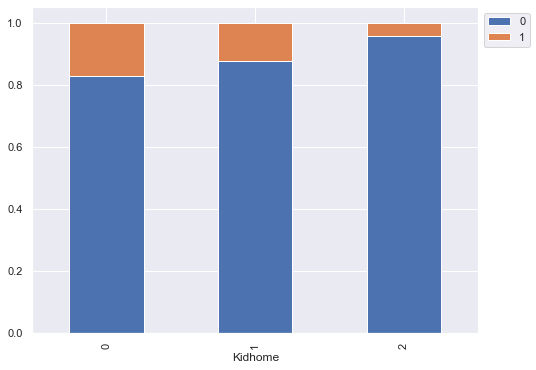

<IPython.core.display.Javascript object>

In [94]:
stacked_barplot(data, "Kidhome", "Response")

Response     0    1   All
Teenhome                 
All       1883  333  2216
0          911  236  1147
1          926   92  1018
2           46    5    51
------------------------------------------------------------------------------------------------------------------------


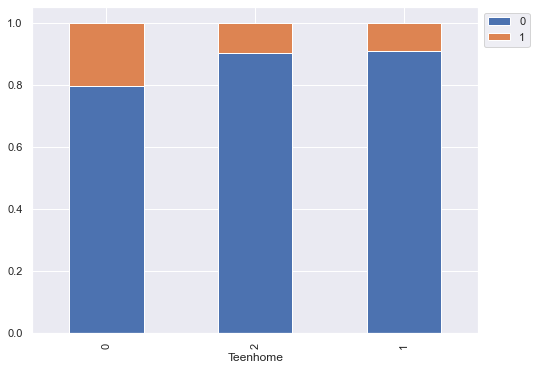

<IPython.core.display.Javascript object>

In [95]:
stacked_barplot(data, "Teenhome", "Response")

Response              0    1   All
NumDealsPurchases                 
All                1883  333  2216
1                   801  159   960
2                   445   48   493
3                   255   38   293
4                   162   26   188
0                    28   16    44
5                    78   16    94
6                    48   12    60
7                    31    8    39
9                     5    3     8
10                    2    3     5
11                    2    3     5
8                    13    1    14
12                    3    0     3
13                    3    0     3
15                    7    0     7
------------------------------------------------------------------------------------------------------------------------


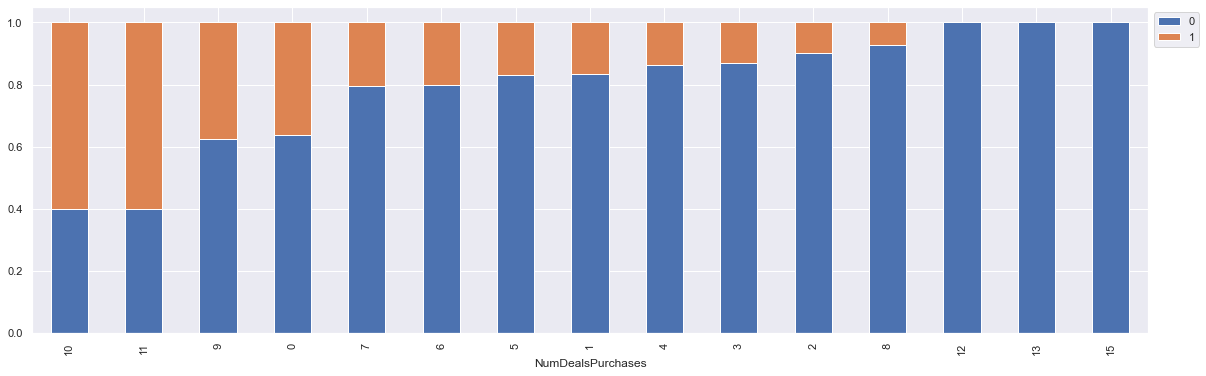

<IPython.core.display.Javascript object>

In [96]:
stacked_barplot(data, "NumDealsPurchases", "Response")

In [65]:
cat_columns

Index(['Education', 'Marital_Status', 'Kidhome', 'Teenhome',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'age_group', 'date_customer'],
      dtype='object')

<IPython.core.display.Javascript object>

In [66]:
num_columns

Index(['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'],
      dtype='object')

<IPython.core.display.Javascript object>

### <a id='link1'>Summary of EDA</a>

**Data Description:**

- The target variable (`rating`) is of *float* type.
- `title`, `description`, `mediaType`, `sznOfRelease`, and `studio_primary` are of *object* type.
- `ongoing` column is of *bool* type.
- All other columns are numeric in nature.
- The `title` and `description` columns are dropped for modeling as they are highly textual in nature.
- There are no duplicate values in the data.
- There are missing values in the data. The rows with missing data have been dropped.


**Observations from EDA:**

- `rating`: The anime ratings are close to normally distributed, with a mean rating of 2.74. The rating increases with an increase in the number of people who have watched or want to watch the anime.
- `eps`: The distribution is heavily right-skewed as there are many anime movies in the data (at least 50%), and they are considered to be of only one episode as per data description. The number of episodes increases as the anime runs for more years.
- `duration`: The distribution is right-skewed with a median anime runtime of less than 10 minutes. With the increase in rating, the duration increases.
- `years_running`: The distribution is heavily right-skewed, and at least 75% of the anime have run for less than 1 year.
- `watched`: The distribution is heavily right-skewed, and most of the anime have less than 500 viewers. This attribute is highly correlated with the `wantWatch` and `votes` attributes.
- `watching`: The distribution is heavily right-skewed and highly correlated with the `dropped` attribute.
- `wantWatch`: The distribution is heavily right-skewed with a median value of 132 potential watchers.
- `dropped`: The distribution is heavily right-skewed with a drop of 25 viewers on average.
- `votes`: The distribution is heavily right-skewed, and few shows have more than 5000 votes.
- `mediaType`: 23% of the anime are published for TV, 17% as music videos, and 14% as web series. Anime available as TV series, web series, or music videos have a lower rating in general
- `ongoing`: Less than 1% of the anime in the data are ongoing.
- `sznOfRelease`: The season of release is missing for nearly 90% of the anime in the data, and is spread out almost evenly across all seasons when available. Anime ratings have a similar distribution across all the seasons of release.
- `studio_primary`: Nearly 40% of the anime in the data are produced by studios not listed in the data. Toei Animation is the most common studio among the available studio names. In general, the ratings are low for anime produced by DLE studios and studios other than the ones listed in the data.
- `studios_colab`: More than 95% of the anime in the data do not involve collaboration between studios.
- `contentWarn`: Less than 10% of the anime in the data have an associated content warning.
- `tag_<tag/genre>`: There are 1747 anime that are based on manga, 1920 of the Comedy genre, 1238 of the Action genre, 1079 anime of the Romance genre, and more.

## Analysis

## Conclusions

## Recommendations